---
# MetCompB (2023/1) -- UFRGS
---

##### Aqui tem 2 playlist no youtube que achei muito boa pra explicar essas questões de distribuição (usei isso nas disciplinas de estatística e métodos estatísticos na graduação) --> são vídeos curtos, uns de explicação teórica e outros com exemplos de aplicação e resolução de exercícios

Distribuição de Poisson: https://youtube.com/playlist?list=PL7xT0Gz6G0-QM-vxH-I1N89OoZ9PLZo_K

Distribuição Bernoulli x Binomial x Normal:   https://youtube.com/playlist?list=PL7xT0Gz6G0-QE_GjV3WevJC7zWyhKm77h

---
* Nesse notebook há 3 questões de Distribuição Binomial (Solução Algébrica e em Python)
* Nesse notebook há 3 questões de Distribuição Poisson (Solução Algébrica e em Python)
* Também há a solução da Questão 2 da prova 2 da disciplina de Métodos, que seria pra usar ambas distribuições.

---
---
---
---

### Exercício 1: Binomial
---
<img src="Binomial_ex1.png" alt="Binomial_ex1" width="600">

### Resolução usando scipy

A probabilidade de obter exatamente 3 sucessos em 5 ensaios é 0.3456


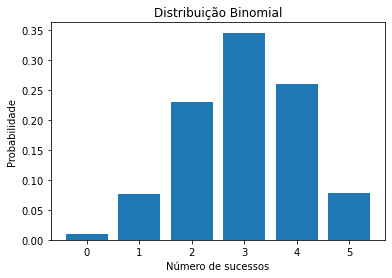

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parâmetros do problema
n = 5  # número de ensaios
p = 0.6  # probabilidade de sucesso (obter cara, no caso)

# Calculando a probabilidade de X = 3 usando a distribuição binomial
x = 3
probabilidade = binom.pmf(x, n, p)

# Exibindo o resultado numérico
print(f"A probabilidade de obter exatamente {x} sucessos em {n} ensaios é {probabilidade:.4f}")

# Criando um gráfico da distribuição binomial
x_valores = np.arange(0, n+1)
probabilidades = binom.pmf(x_valores, n, p)

plt.bar(x_valores, probabilidades)
plt.xlabel("Número de sucessos")
plt.ylabel("Probabilidade")
plt.title("Distribuição Binomial")
plt.show()

---
### Exercício 2: Binomial
<img src="Binomial_ex2.png" alt="Binomial_ex1" width="500">

### Resolução usando apenas NumPy

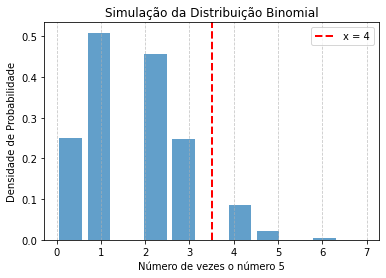

A probabilidade de obter pelo menos 4 vezes o número 5 em 10 lançamentos é 0.0711


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
n = 10  # número de ensaios (lançamentos)
p = 1/6  # probabilidade de obter o número 5 em um lançamento

# Número mínimo de sucessos desejados
x_minimo = 4

# Calculando a probabilidade usando a função de distribuição binomial cumulativa
probabilidade = 1 - np.sum(np.random.binomial(n, p, 100000) < x_minimo) / 100000

# Criando um gráfico do histograma dos resultados simulados
plt.hist(np.random.binomial(n, p, 100000), bins=n+1, density=True, alpha=0.7, rwidth=0.8)  
plt.axvline(x_minimo - 0.5, color='red', linestyle='dashed', linewidth=2, label=f'x = {x_minimo}') #Só pra add a linha tracejada em vermelho
plt.xlabel("Número de vezes o número 5")
plt.ylabel("Densidade de Probabilidade")
plt.title("Simulação da Distribuição Binomial")
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# Exibindo o resultado numérico
print(f"A probabilidade de obter pelo menos {x_minimo} vezes o número 5 em {n} lançamentos é {probabilidade:.4f}")

''' * density --> no histograma serve para normalizar a contagem das frequências dos dados para que a área total do histograma seja igual a 1. 
    * rwidth  --> ter espaço entre as barras do histograma
'''

---
### Exercício 3: Binomial
<img src="Binomial_ex3.png" alt="Binomial_ex1" width="500">

### Resolução mais "manual" --> criando na mão a função de Distribuição Binomial

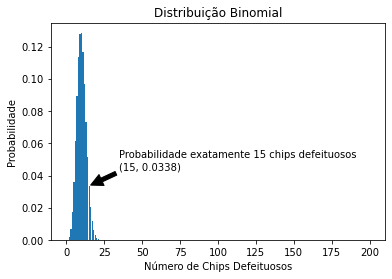

Probabilidade de encontrar exatamente 15 chips defeituosos: 0.0338


In [19]:
import matplotlib.pyplot as plt

def binomial_prob(n, k, p):
    def factorial(x):
        if x == 0:
            return 1
        return x * factorial(x - 1)
    
    coef_binomial = factorial(n) / (factorial(k) * factorial(n - k))
    prob = coef_binomial * (p ** k) * ((1 - p) ** (n - k))
    return prob

n = 200  # tamanho da amostra
p = 0.05  # probabilidade de chip defeituoso
defeituosos = 15  # número de chips defeituosos

# Calcular a probabilidade de encontrar exatamente 15 chips defeituosos
prob_15_defeituosos = binomial_prob(n, defeituosos, p)


# ----------------------------
'''### Plot do gráfico ### '''
# ----------------------------

x = list(range(n + 1))  # número de chips defeituosos
y = [binomial_prob(n, k, p) for k in x]  # probabilidade para cada número de chips defeituosos

plt.bar(x, y)
plt.xlabel('Número de Chips Defeituosos')
plt.ylabel('Probabilidade')
plt.title('Distribuição Binomial')

# Destacar o valor da Probabilidade de exatamente 15 chips defeituosos
plt.annotate(f'Probabilidade exatamente 15 chips defeituosos\n({defeituosos}, {prob_15_defeituosos:.4f})',
             xy=(defeituosos, prob_15_defeituosos),
             xytext=(defeituosos + 20, prob_15_defeituosos + 0.01),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

print(f"Probabilidade de encontrar exatamente 15 chips defeituosos: {prob_15_defeituosos:.4f}")

---
---
---
---

### Exercício 1: Poisson
<img src="Poisson_ex1.png" alt="Binomial_ex1" width="500">

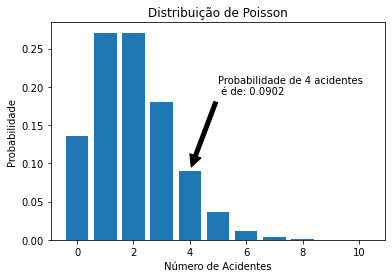

' * variável "lmbda" --> significa letra grega Lambda da fórmula '

In [38]:
import math
import matplotlib.pyplot as plt

def poisson_prob(lmbda, k):
    prob = (math.exp(-lmbda) * (lmbda ** k)) / math.factorial(k)
    return prob

lmbda = 2  # média de acidentes por dia
k = 4  # número de acidentes que queremos calcular a probabilidade

# Calcular a probabilidade de exatamente 4 acidentes em um dia
prob_4_acidentes = poisson_prob(lmbda, k)

# Criar o gráfico
x = list(range(0, 11))  # número de acidentes
y = [poisson_prob(lmbda, k) for k in x]  # probabilidade para cada número de acidentes

plt.bar(x, y)
plt.xlabel('Número de Acidentes')
plt.ylabel('Probabilidade')
plt.title('Distribuição de Poisson')

# Destacar o valor de maior probabilidade
plt.annotate(f'Probabilidade de {k} acidentes \n é de: {prob_4_acidentes:.4f}',
             xy=(k, prob_4_acidentes),
             xytext=(k + 1, prob_4_acidentes + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

''' * variável "lmbda" --> significa letra grega Lambda da fórmula '''

---
### Exercício 2: Poisson
<img src="Poisson_ex2.png" alt="Binomial_ex1" width="500">

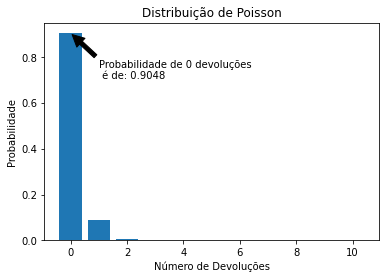

In [31]:
import math
import matplotlib.pyplot as plt

def poisson_prob(lmbda, k):
    prob = (math.exp(-lmbda) * (lmbda ** k)) / math.factorial(k)
    return prob

lmbda = 0.1  # média de devoluções por dia
k = 0  # número de devoluções que queremos calcular a probabilidade

# Calcular a probabilidade de não haver devoluções em um dia
prob_zero_devolucoes = poisson_prob(lmbda, k)

# Criar o gráfico
x = list(range(0, 11))  # número de devoluções
y = [poisson_prob(lmbda, k) for k in x]  # probabilidade para cada número de devoluções

plt.bar(x, y)
plt.xlabel('Número de Devoluções')
plt.ylabel('Probabilidade')
plt.title('Distribuição de Poisson')

# Destacar o valor de maior probabilidade (zero devoluções)
plt.annotate(f'Probabilidade de {k} devoluções\n é de: {prob_zero_devolucoes:.4f}',
             xy=(k, prob_zero_devolucoes),
             xytext=(k + 1, prob_zero_devolucoes - 0.2),  # Ajustar a posição vertical da anotação
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

---
### Exercício 3: Poisson
<img src="Poisson_ex3.png" alt="Binomial_ex1" width="500">

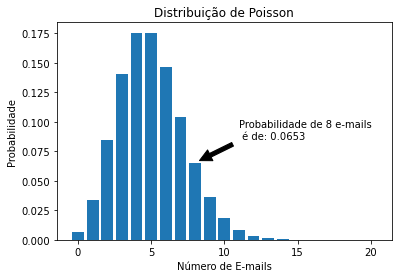

A probabilidade de receber exatamente 8 e-mails em uma hora é 0.0653


In [37]:
import math
import matplotlib.pyplot as plt

def poisson_prob(lmbda, k):
    prob = (math.exp(-lmbda) * (lmbda ** k)) / math.factorial(k)
    return prob

lmbda = 5  # média de e-mails por hora
k = 8  # número de e-mails que queremos calcular a probabilidade

# Calcular a probabilidade de receber exatamente 8 e-mails em uma hora
prob_8_emails = poisson_prob(lmbda, k)

# Criar o gráfico
x = list(range(0, 21))  # número de e-mails
y = [poisson_prob(lmbda, k) for k in x]  # probabilidade para cada número de e-mails

plt.bar(x, y)
plt.xlabel('Número de E-mails')
plt.ylabel('Probabilidade')
plt.title('Distribuição de Poisson')

# Destacar o valor de maior probabilidade (8 e-mails)
plt.annotate(f'Probabilidade de {k} e-mails \n é de: {prob_8_emails:.4f}',
             xy=(k, prob_8_emails),
             xytext=(k + 3, prob_8_emails + 0.02),  # Ajustar a posição vertical da anotação
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

print(f"A probabilidade de receber exatamente {k} e-mails em uma hora é {prob_8_emails:.4f}")

### Usando escopo dado nos slides da disciplina:

--> http://moodle.if.ufrgs.br/pluginfile.php/458/mod_resource/content/2/aula26_random-poisson.pdf

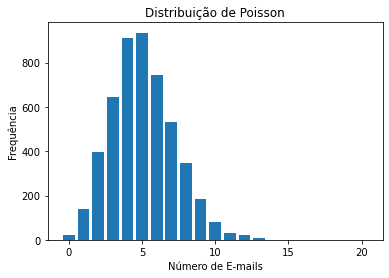

A probabilidade de receber exatamente 8 e-mails em uma hora é: 0.0653


In [43]:
import random
import matplotlib.pyplot as plt

# Parâmetros do código
lmbda = 5     # média de e-mails por hora
Nstep = 100   # número de passos
N     = 5000  # número de experimentos
k     = 8     # número de e-mails desejado

# Função para simular um experimento de Poisson
def experiment_poisson(lmbda, Nstep):
    p = lmbda / Nstep
    count = 0
    for i in range(Nstep):
        x = random.random()
        if x < p:
            count += 1
    return count

# Simulação de N experimentos de Poisson
hist = [0] * 21  # histograma para contagem de ocorrências de cada número de e-mails

for _ in range(N):
    count = experiment_poisson(lmbda, Nstep)
    hist[count] += 1

# Plot do histograma
plt.bar(range(len(hist)), hist)
plt.xlabel('Número de E-mails'); plt.ylabel('Frequência'); plt.title('Distribuição de Poisson')
plt.show()


# Função para calcular a probabilidade de Poisson
def poisson_probability(lmbda, k):
    return (math.exp(-lmbda) * lmbda**k) / math.factorial(k)

probability_8_emails = poisson_probability(lmbda, k)
print(f"A probabilidade de receber exatamente 8 e-mails em uma hora é: {probability_8_emails:.4f}")

---
---
### Resolução Questão 2 -- Prova 2 , da disciplina de Metódos Computacionais B, UFRGS ( 2023/1 ). 

<img src="Questao2_Prova2_MetCompB.png" alt="Questao2_Prova2_MetCompB" width="500">

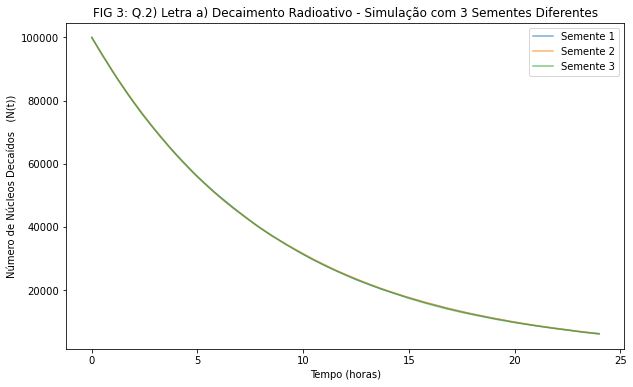

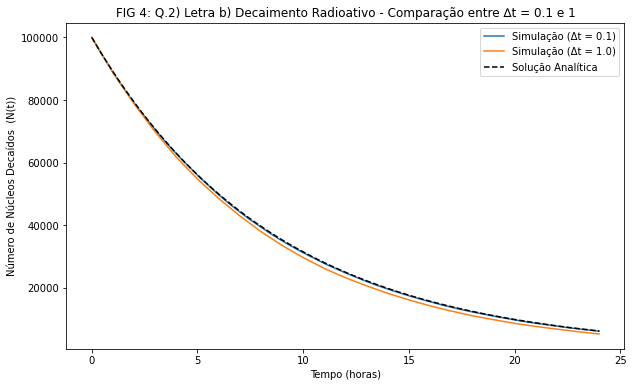

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Função para simular o decaimento
def radioactive_decay_simulation(N0, lambda_, dt):
    N = N0
    time_steps = np.arange(0, 24+dt, dt)
    decay_counts = []
    for t in time_steps:
        decay_counts.append(N)
        decay_prob = lambda_ * dt
        decayed_particles = np.sum(np.random.uniform(0, 1, N) < decay_prob)
        N -= decayed_particles
    return time_steps, decay_counts

''' ________________________________________________ User '''

# Parâmetros iniciais
N0        = 10**5                  # Número inicial de núcleos
half_life = 6                      # Meia-vida do Tecnécio em horas
lambda_   = np.log(2) / half_life  # Taxa de decaimento
dt_values = [0.1, 1.0]             # Valores de intervalo de tempo para comparação


# Parte a
plt.figure(figsize=(10, 6))
for _ in range(3):
    T, decay_counts = radioactive_decay_simulation(N0, lambda_, 0.1)
    plt.plot(T, decay_counts, alpha=0.6)

plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos Decaídos   (N(t))')
plt.title('FIG 3: Q.2) Letra a) Decaimento Radioativo - Simulação com 3 Sementes Diferentes')
plt.legend(['Semente 1', 'Semente 2', 'Semente 3']); plt.show()

# Parte b
plt.figure(figsize=(10, 6))
for dt in dt_values:
    T, decay_counts = radioactive_decay_simulation(N0, lambda_, dt)    
    plt.plot(T, decay_counts, label=f'Simulação (Δt = {dt})')

# Solução analítica
t_analytical = np.linspace(0, 24, 100); N_analytical = N0*np.exp(-lambda_*t_analytical)
plt.plot(t_analytical, N_analytical, 'k--', label='Solução Analítica')

plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos Decaídos  (N(t))')
plt.title('FIG 4: Q.2) Letra b) Decaimento Radioativo - Comparação entre ∆t = 0.1 e 1')
plt.legend(); plt.show()

### Resolução Questão 2, usando Distribuição de Poisson (ao invés de Binomial)

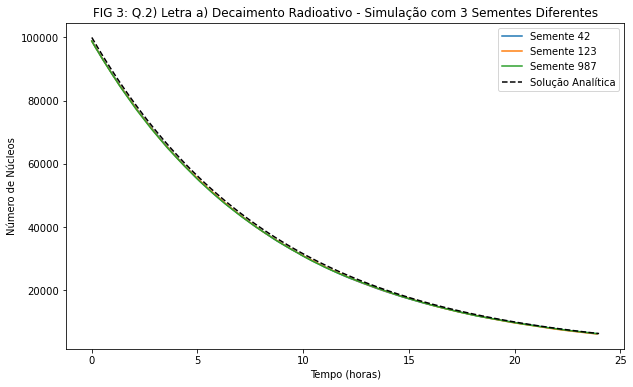

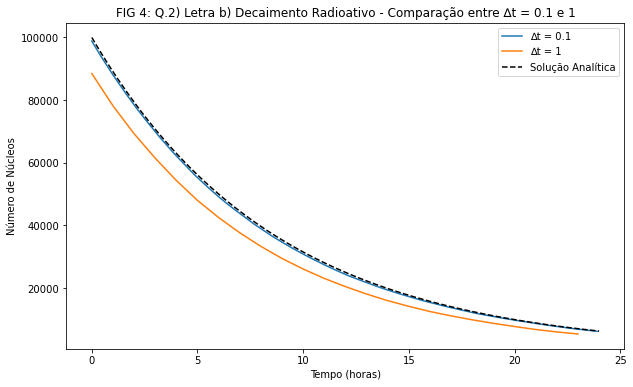

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
N0 = 10**5; half_life = 6; lambda_ = np.log(2) / half_life; dt = 0.1; tf = 24
seeds = [42, 123, 987]  # Sementes diferentes para a simulação

# Função para simular o decaimento usando distribuição de Poisson
def radioactive_decay_simulation_poisson(N0, lambda_, dt, tf, seed):
    Nt = N0; X = []; Y = []
    np.random.seed(seed)
    for it in range(int(tf / dt)):
        decay = np.random.poisson(lambda_ * dt * Nt)
        Nt -= decay
        X.append(it * dt); Y.append(Nt)
    return X, Y

'''___________________ Q.2 Parte a) ___________________''' 

plt.figure(figsize=(10, 6))

# Simulação e plot para três sementes diferentes
for seed in seeds:
    X, Y = radioactive_decay_simulation_poisson(N0, lambda_, dt, tf, seed)
    plt.plot(X, Y, label=f'Semente {seed}')

# Solução analítica
t_analytical = np.linspace(0, 24, 100); N_analytical = N0*np.exp(-lambda_*t_analytical)
plt.plot(t_analytical, N_analytical, 'k--', label='Solução Analítica')

plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos')
plt.title('FIG 3: Q.2) Letra a) Decaimento Radioativo - Simulação com 3 Sementes Diferentes')
plt.legend(); plt.show()

'''___________________ Q.2 Parte b) ___________________'''

plt.figure(figsize=(10, 6))

# Simulação e plot para ∆t = 0.1
X_1, Y_1 = radioactive_decay_simulation_poisson(N0, lambda_, 0.1, tf, seeds[0])
plt.plot(X_1, Y_1, label=f'∆t = {dt_1}')

# Simulação e plot para ∆t = 1
X_2, Y_2 = radioactive_decay_simulation_poisson(N0, lambda_, 1, tf, seeds[0])
plt.plot(X_2, Y_2, label=f'∆t = {dt_2}')

# Solução analítica
plt.plot(t_analytical, N_analytical, 'k--', label='Solução Analítica')

plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos')
plt.title('FIG 4: Q.2) Letra b) Decaimento Radioativo - Comparação entre ∆t = 0.1 e 1')
plt.legend(); plt.show()

#### Aqui é pra mostrar que o escopo mostrado do cálculo de Poisson nos slides da disciplina equivale ao método alternativo e mais direto usando "np.random.poisson(...)":

--> http://moodle.if.ufrgs.br/pluginfile.php/458/mod_resource/content/2/aula26_random-poisson.pdf

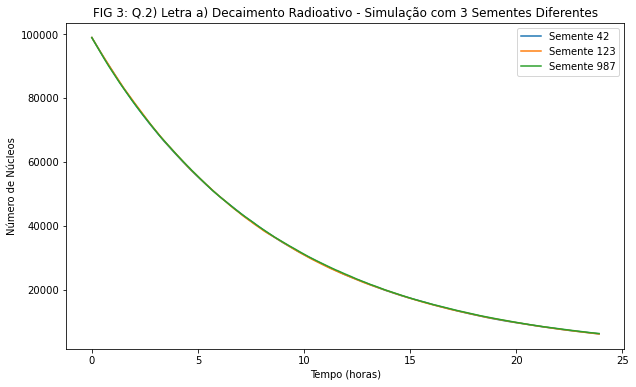

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
N0 = 10**5; half_life = 6; lambda_ = np.log(2) / half_life
dt = 0.1; tf = 24; Nstep = int(tf / dt)
seeds = [42, 123, 987]  # Sementes diferentes para a simulação

# Função para simular o decaimento usando distribuição de Poisson
def radioactive_decay_simulation_poisson(N0, lambda_, dt, Nstep, seed):
    Nt = N0; X = []; Y = []
    np.random.seed(seed)
    for it in range(Nstep):
        decay = 0
        for j in range(1, Nt + 1):
            x = np.random.random()
            if x < lambda_ * dt:
                decay += 1
        Nt -= decay
        X.append(it * dt)
        Y.append(Nt)
    return X, Y

# Criar figura para o gráfico
plt.figure(figsize=(10, 6))

# Simulação e plot para três sementes diferentes
for seed in seeds:
    X, Y = radioactive_decay_simulation_poisson(N0, lambda_, dt, Nstep, seed)
    plt.plot(X, Y, label=f'Semente {seed}')

plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos')
plt.title('FIG 3: Q.2) Letra a) Decaimento Radioativo - Simulação com 3 Sementes Diferentes')
plt.legend(); plt.show()


### Compara resolução da Distribuição Binomial com a  de Poisson

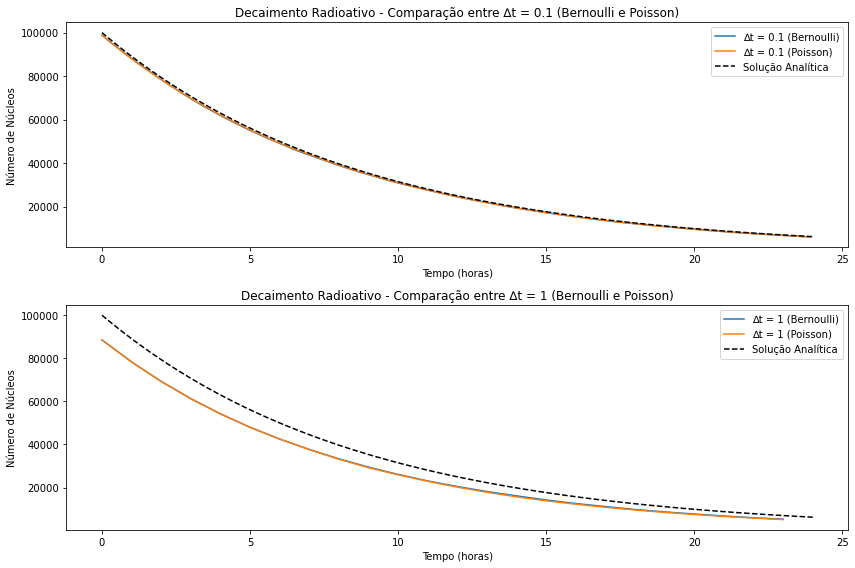

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
N0 = 10**5; half_life = 6; lambda_ = np.log(2) / half_life; dt_1 = 0.1; dt_2 = 1; tf = 24

# Função para simular o decaimento usando distribuição Binomial
def radioactive_decay_simulation_binomial(N0, lambda_, dt, tf, seed):
    np.random.seed(seed)
    Nt = N0; X = []; Y = []
    p = lambda_ * dt
    for it in range(int(tf / dt)):
        decay = np.random.binomial(Nt, p)
        Nt -= decay
        X.append(it * dt); Y.append(Nt)
    return X, Y

# Função para simular o decaimento usando distribuição de Poisson
def radioactive_decay_simulation_poisson(N0, lambda_, dt, tf):
    Nt = N0; X = []; Y = []
    for it in range(int(tf / dt)):
        decay = np.random.poisson(lambda_ * dt * Nt)
        Nt -= decay
        X.append(it * dt); Y.append(Nt)
    return X, Y

# Simulação e plot para ∆t = 0.1 usando distribuição Binomial
X_1, Y_1 = radioactive_decay_simulation_binomial(N0, lambda_, dt_1, tf, seed=0)
# Simulação e plot para ∆t = 0.1 usando distribuição de Poisson
X_1_p, Y_1_p = radioactive_decay_simulation_poisson(N0, lambda_, dt_1, tf)
# Simulação e plot para ∆t = 1 usando distribuição Binomial
X_2, Y_2 = radioactive_decay_simulation_binomial(N0, lambda_, dt_2, tf, seed=1)
# Simulação e plot para ∆t = 1 usando distribuição de Poisson
X_2_p, Y_2_p = radioactive_decay_simulation_poisson(N0, lambda_, dt_2, tf)
# Solução analítica
t_analytical = np.linspace(0, tf, 100); N_analytical = N0*np.exp(-lambda_*t_analytical)

# Plot dos resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(X_1, Y_1, label=f'∆t = {dt_1} (Binomial)')
plt.plot(X_1_p, Y_1_p, label=f'∆t = {dt_1} (Poisson)')
plt.plot(t_analytical, N_analytical, 'k--', label='Solução Analítica')
plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos')
plt.title('Decaimento Radioativo - Comparação entre ∆t = 0.1 (Binomial e Poisson)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(X_2, Y_2, label=f'∆t = {dt_2} (Binomial)')
plt.plot(X_2_p, Y_2_p, label=f'∆t = {dt_2} (Poisson)')
plt.plot(t_analytical, N_analytical, 'k--', label='Solução Analítica')
plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos')
plt.title('Decaimento Radioativo - Comparação entre ∆t = 1 (Binomial e Poisson)')
plt.legend()

plt.tight_layout(); plt.show()
